# Predicting if the Passenger Survived or not in the Titinic Dataset from Kaggle using basic Logistic Regression.
Link for the Dataset
https://www.kaggle.com/c/titanic

In [3]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
#read the file
df=pd.read_csv('titanic_train.csv')

In [7]:
#check the head,info
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
df.info()  #there are some values missing in the Age and Cabin column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# For more info about Color Palettes:
https://seaborn.pydata.org/tutorial/color_palettes.html

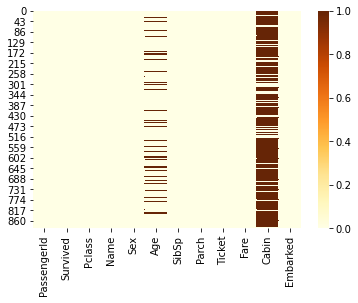

In [18]:
#visual representation of the same. The lines indicate null values
sns.heatmap(df.isnull(),cmap="YlOrBr")

In [ ]:
#some more exploratory data analysis

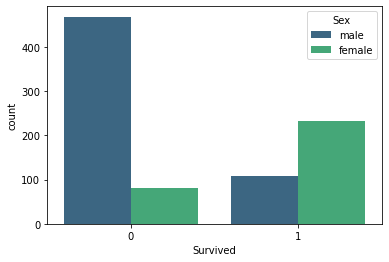

In [22]:
#more female passengers survived than male
sns.countplot(x=df['Survived'],hue=df['Sex'],palette='viridis')

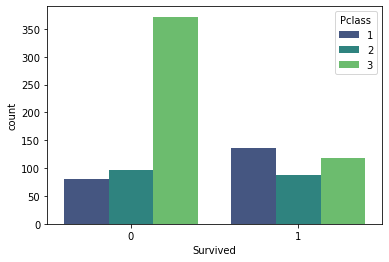

In [24]:
#less number of passengers from class 3 survived. 
sns.countplot(x=df['Survived'],hue=df['Pclass'],palette='viridis')

# Filling the missing values
It is not fruitfull to fill the missing values from cabin column as most of the data is unavailable. Hence, fill in the missing values of Age column by taking the mean.

In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [39]:
df['Age']=df['Age'].apply(lambda x :df['Age'].mean() if pd.isnull(x) else x)

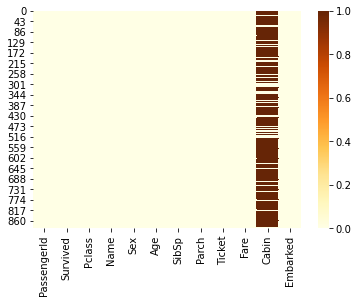

In [41]:
sns.heatmap(df.isnull(),cmap="YlOrBr")

In [46]:
# drop the cabin column
df.drop('Cabin',axis=1,inplace=True)

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


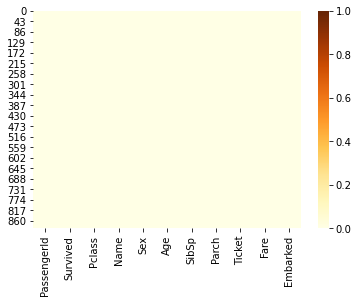

In [49]:
#no more NaN values
sns.heatmap(df.isnull(),cmap="YlOrBr")

## Converting Categorical Features 

Convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs. i.e the 'Embarked' and 'sex' column.
More info on Dummy variables
https://www.geeksforgeeks.org/python-pandas-get_dummies-method/#:~:text=drop_first%3A%20Remove%20first%20level%20to,Default%20value%20is%20np.

In [51]:
sex = pd.get_dummies(df['Sex'],drop_first=True)
embark = pd.get_dummies(df['Embarked'],drop_first=True)

In [54]:
#drop those columns
df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [61]:
#concate df,sex and embark
df=pd.concat([df,sex,embark],axis=1)

In [62]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


# Logistic Regression Model

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(df.drop('Survived',axis=1), 
                                                    df['Survived'], test_size=0.30, 
                                                    random_state=101)

In [65]:
from sklearn.linear_model import LogisticRegression

In [67]:
#create an instance of the model and fit the training data
lg=LogisticRegression()
lg.fit(X_train,y_train)

C:\Users\shubh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [68]:
#predict using the test data
predictions=lg.predict(X_test)

In [75]:
#to check how well the model is working!
from sklearn.metrics import classification_report

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.76      0.87      0.81       154
           1       0.78      0.63      0.70       114

    accuracy                           0.77       268
   macro avg       0.77      0.75      0.76       268
weighted avg       0.77      0.77      0.76       268



For more details about confusion matrix
https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/#:~:text=A%20confusion%20matrix%20is%20a,related%20terminology%20can%20be%20confusing.

In [72]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,predictions)

array([[134,  20],
       [ 42,  72]], dtype=int64)

In [74]:
#for checking the error rates
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error:  0.23134328358208955
Mean Squared Error:  0.23134328358208955
Root Mean Squared Error:  0.48098158341259756


# This model can be futher improved using random forests and feature engineering!